# Introduction to pandas for Data Analysis

This notebook introduces pandas, Python's powerful data manipulation library, by comparing it with familiar Excel operations.

## Learning Objectives
1. Understand pandas DataFrame basics
2. Learn Excel to pandas translations
3. Perform basic data analysis with real sales data

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
#plt.style.use('seaborn')
#%matplotlib inline

## 1. Loading Data (Like Opening an Excel File)

In Excel, you open files directly. In pandas, we use functions like `read_csv()`, `read_excel()`, etc.

In [2]:
# Load the retail sales data
sales_df = pd.read_csv(r'E:\Data Science\gachau_learning\datasets\sales\retail_sales_data.csv')

#import pandas as pd
#sales = pd.read_csv('E:\Data Science\gachau_learning\datasets\sales\sample_sales_data.csv')
#print(sales.head())

# Convert Date column to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Display the first few rows (like scrolling to top in Excel)
print("First 5 rows:")
sales_df.head()

First 5 rows:


,Date,Product,Category,Region,Quantity,Unit_Price,Total_Sales,On_Promotion
0,2023-01-01,Laptop,Electronics,East,81,997.22,80775.20,False
1,2023-01-01,Laptop,Electronics,West,89,995.31,88582.32,False
2,2023-01-01,Laptop,Electronics,North,87,1015.34,88334.45,False
3,2023-01-01,Laptop,Electronics,South,73,990.72,72322.69,False
4,2023-01-01,Smartphone,Electronics,East,60,673.20,40392.27,False


<Axes: >

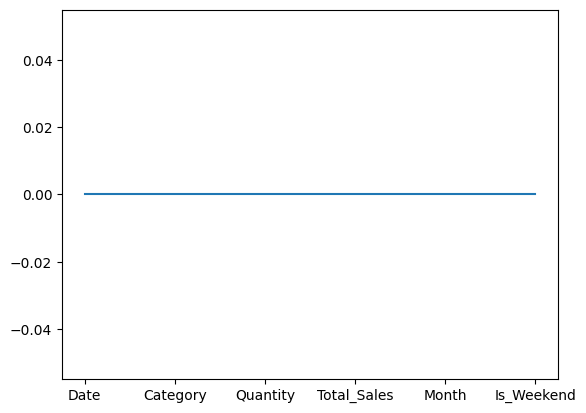

In [14]:
sales_df.isna().sum().plot()

## 2. Basic Excel Operations in pandas

Common Excel operations and their pandas equivalents:

In [3]:
# Data Overview (like Excel's sheet overview)
print("Dataset Shape (rows, columns):", sales_df.shape)
print("\nColumn Names:")
print(sales_df.columns.tolist())

# Basic statistics (like Excel's descriptive statistics)
print("\nNumerical Summary:")
sales_df.describe()

Dataset Shape (rows, columns): (10220, 8)

Column Names:
['Date', 'Product', 'Category', 'Region', 'Quantity', 'Unit_Price', 'Total_Sales', 'On_Promotion']

Numerical Summary:


,Date,Quantity,Unit_Price,Total_Sales
count,10220,10220.000000,10220.000000,10220.000000
mean,2023-07-02 00:00:00,127.278278,348.615800,44046.564841
min,2023-01-01 00:00:00,17.000000,37.830000,668.880000
25%,2023-04-02 00:00:00,89.000000,80.890000,10476.640000
50%,2023-07-02 00:00:00,114.000000,199.490000,26257.420000
75%,2023-10-01 00:00:00,150.000000,686.432500,58704.910000
max,2023-12-31 00:00:00,504.000000,1063.720000,354184.870000
std,NaN,57.787256,326.368759,49279.274929


## 3. Filtering Data (Like Excel's Filter Feature)

In [4]:
# Multiple filters (like Excel's filter combinations)
electronics = sales_df[sales_df['Category'] == 'Electronics']
high_value = sales_df[sales_df['Total_Sales'] > 2000]
promotional_sales = sales_df[sales_df['On_Promotion'] == True]

print("Electronics Products Summary:")
print(electronics['Total_Sales'].describe())

print("\nNumber of High-Value Sales:", len(high_value))
print("Number of Promotional Sales:", len(promotional_sales))

Electronics Products Summary:
count      4380.000000
mean      75223.847297
std       60103.387595
min        2681.680000
25%       21441.742500
50%       64936.110000
75%      100481.752500
max      354184.870000
Name: Total_Sales, dtype: float64

Number of High-Value Sales: 10212
Number of Promotional Sales: 1055


## 4. Time-Based Analysis (Like Excel's Date Functions)

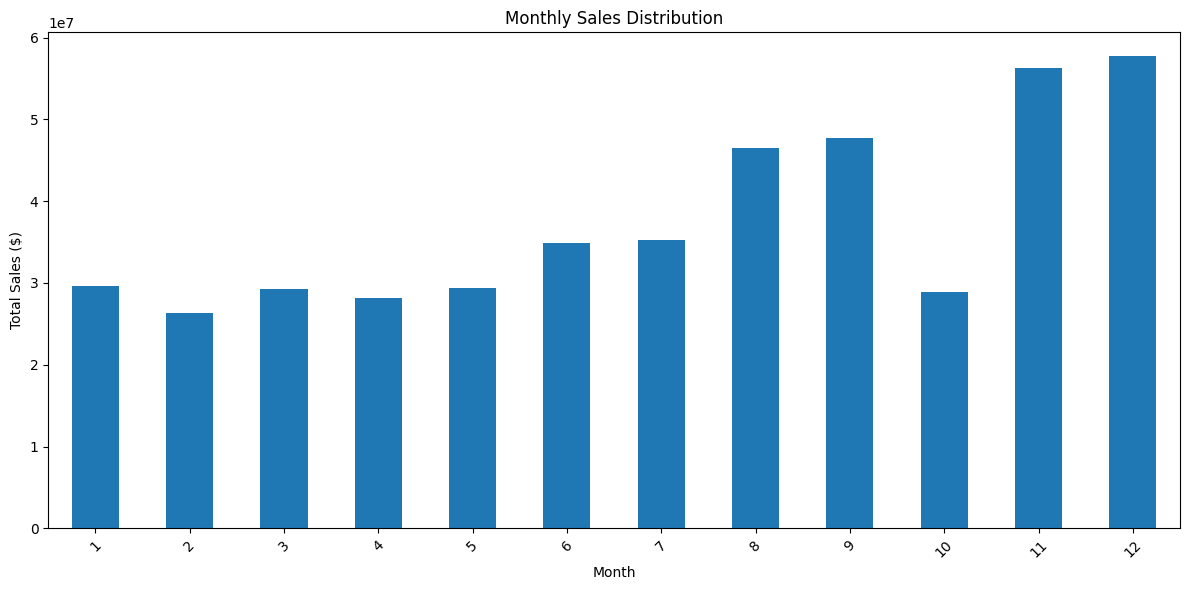

In [5]:
# Add time-based columns
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day_of_Week'] = sales_df['Date'].dt.day_name()
sales_df['Is_Weekend'] = sales_df['Date'].dt.dayofweek.isin([5, 6])

# Monthly sales analysis
monthly_sales = sales_df.groupby('Month')['Total_Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Grouping and Aggregating (Like Excel's PivotTables)

In [6]:
# Complex pivot table equivalent
pivot_table = sales_df.pivot_table(
    values=['Total_Sales', 'Quantity'],
    index=['Category', 'Region'],
    columns=['On_Promotion'],
    aggfunc={'Total_Sales': 'sum', 'Quantity': 'mean'},
    fill_value=0
)

print("Sales and Quantity by Category, Region, and Promotion Status:")
print(pivot_table)

Sales and Quantity by Category, Region, and Promotion Status:
                      Quantity              Total_Sales            
On_Promotion             False       True         False       True 
Category    Region                                                 
Appliances  East    120.144597  121.972603   5176091.61   445739.70
            North   120.157813  124.800000   4959400.31   634221.32
            South   119.166667  109.562500   5152645.24   366408.72
            West    119.184252  121.263158   4916907.18   600470.36
Electronics East    125.737271  120.991150  76311895.99  6366749.20
            North   125.562245  119.982609  75508155.90  6134549.73
            South   124.945674  122.792079  75449197.28  6539144.68
            West    125.946465  134.609524  76256331.54  6914426.84
Furniture   East    137.685271  142.694118  22163074.51  2426135.24
            North   137.179372  125.098361  22968112.56  1544760.10
            South   138.877301  133.371795  22579231.8

## 6. Advanced Visualizations

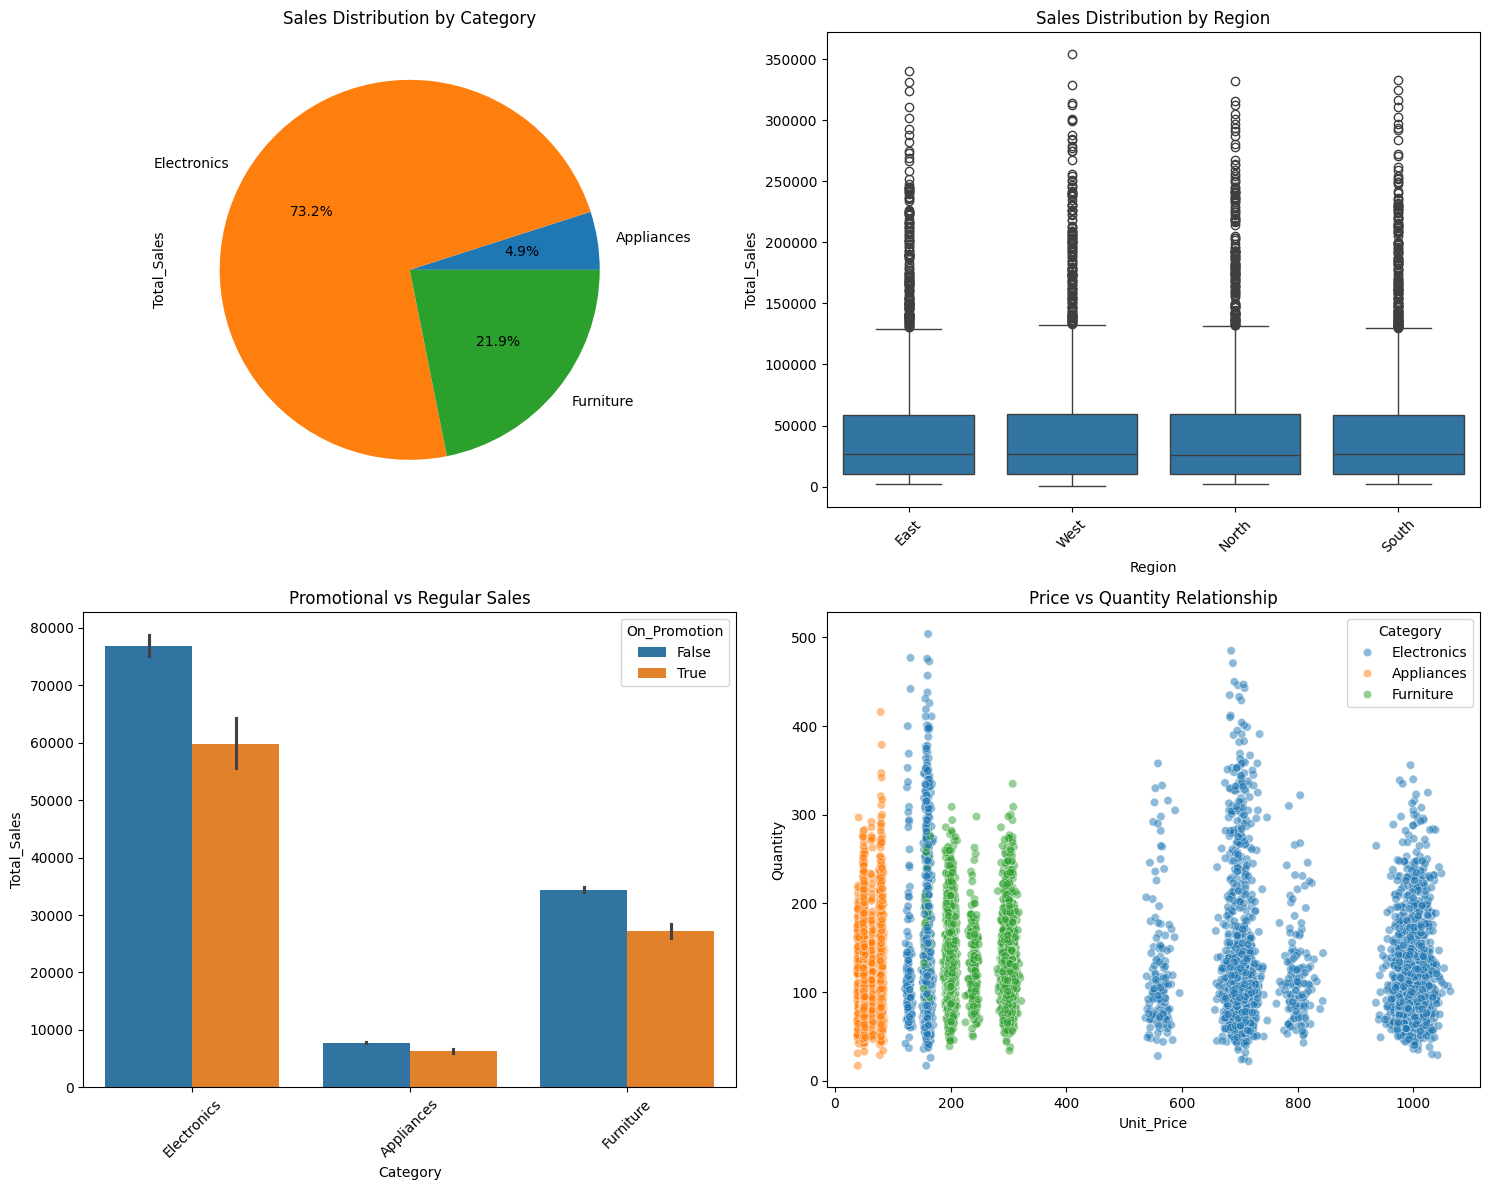

In [7]:
# Create a dashboard-style visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Category Distribution
category_sales = sales_df.groupby('Category')['Total_Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', ax=ax1)
ax1.set_title('Sales Distribution by Category')

# 2. Regional Performance
sns.boxplot(data=sales_df, x='Region', y='Total_Sales', ax=ax2)
ax2.set_title('Sales Distribution by Region')
ax2.tick_params(axis='x', rotation=45)

# 3. Promotional Impact
sns.barplot(data=sales_df, x='Category', y='Total_Sales', hue='On_Promotion', ax=ax3)
ax3.set_title('Promotional vs Regular Sales')
ax3.tick_params(axis='x', rotation=45)

# 4. Price vs Quantity Relationship
sns.scatterplot(data=sales_df, x='Unit_Price', y='Quantity', hue='Category', alpha=0.5, ax=ax4)
ax4.set_title('Price vs Quantity Relationship')

plt.tight_layout()
plt.show()

## Practice Exercises

1. Time Series Analysis:
   - Calculate daily total sales
   - Find the busiest day of the week
   - Compare weekday vs weekend sales

2. Product Analysis:
   - Calculate profit margins (assuming 40% cost)
   - Find best-selling products by quantity
   - Analyze promotional effectiveness

3. Regional Analysis:
   - Create regional sales rankings
   - Find best-performing category by region
   - Analyze regional seasonal patterns

4. Advanced Dashboard:
   - Create a monthly performance dashboard
   - Add trend lines to visualizations
   - Calculate and plot year-to-date totals